# 1 Author

**Jairaj Patil**:  
**210819108**: 




# 2 Problem formulation

Using the MLEnd Hums and Whistles dataset, build a machine learning pipeline that takes as an input a Potter or a StarWars audio segment and predicts its song label (either Harry or StarWars) and Emotion/mood (either Happy or Sad).

# 3 Machine Learning pipeline

 

- Data Extraction->Feature Extraction-> Model Defination-> Model Evaluation.
>- Data extraction:
>>- Data extraction is the part where we decide what the input for the model will be. Since we are working with a large number of audio file. We will work with subet of the dataset and perform preprocessing to maintain consistency.
>- Feature Extraction:
>>- Features will the input that will used to train and vaildate the model.
>- Model Defination:
>>- This where we implement the model. i.e. Gaussian Naive Bayes, and train the model.
>- Model Evaluation.
>>- The predicated label i.e. the output of the model will me compared based on classification matrix.

# 4 Transformation stage



- We select the features that will be used as an in put to the model.
>- Features that we will Extract are:
>> 1. Power. 
>> 2. Determine the pitch mean. 
>> 3. The standard deviation of the pitch. 
>> 4. The vocal region's fraction.
>> 5. Tempo.
>> 6. spectral centroid.
>> 7. spectral_bandwidth.

# 5 Modelling



Let's build a Gaussian Naive Bayes model for the predictive task of identifying the type of interpretation (hum/whistle) of an audio signal, using the dataset that we have just created.
We will use the GaussianNB method provided by scikit-learn and will split the dataset[Features] defined by X and y into a training set and a validation set.
- Why GaussianNB?
>- Naive Bayes is a classification algorithm suitable for binary and multiclass classification.
>- The likelihood of distinct class values is calculated by multiplying a large number of small numbers together. This can result in a numerical precision underflow. As a result, using a log transform of the probabilities to avoid this underflow is a good idea.
>- It's good at handling multiclass problems, thus it's ideal for detecting sentiment. Whether it belongs in the positive or negative category.
>- It's simple to calculate the prediction's estimated probability, calculating the mean.

# 6 Methodology



- Song label predicition.
>- The Input features will be split into traning and validation sets.
>- Then compare the output(predected label) in terms of accuracy to check if the model is overfitting or underfitting.
>- Evaluate the model as whole based on the micro average F1-score.
- Emotion/Mood prediction.
>- Understanding Feature and it background.
>>- What is the definition of tempo?<br>
The tempo of a piece of music refers to how fast it is played. BPM, Italian terminology, and modern language are the three main ways that tempo is transmitted .
>>- What Is Casual Musical Language or Modern Language ?<br>
The Italian tempo vocabulary is rarely used by jazz and rock artists. Instead, they utilise words like "quick," "slow," "lazily," "relaxed," and "moderate" from everyday English. A drummer may click her sticks to set the tempo in these ensembles, or a band member may play a solo introduction that sets the tempo for the other members.<br> Similarly,tempo can also be used to set a certain mood or emotion, and can be utlilized for prediction of the same.
>- Utilizing the tempo form feature extraction, with set threshold to classifiy whether Predicted label belongs to class Happy or sad.

# 7 Dataset



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import warnings
warnings.filterwarnings("ignore")

- Loading the dataset with 404 sample in total.

In [21]:
star_path='/Users/jairajpatil/Documents/big data 2021-2022/ml/mini project/Basic_1/*.wav'
files = glob.glob(star_path)
len(files)

404

- Understanding what data looks like.

In [22]:
for file in files:
  print(file.split('/')[-1])

S54_hum_2_Potter.wav
S23_hum_3_StarWars.wav
S86_hum_4_StarWars.wav
S36_hum_1_Potter.wav
S77_whistle_2_Potter.wav
S23_hum_4_StarWars.wav
S86_hum_3_StarWars.wav
S53_hum_1_Potter.wav
S31_hum_2_Potter.wav
S35_hum_1_[Potter].wav
S72_whistle_2_Potter.wav
S94_hum_1_Potter.wav
S17_hum_1_Potter.wav
S50_whistle_2_StarWars.wav
S93_hum_2_Potter.wav
S91_whistle_2_Starwars.wav
S114_hum_2_potter.wav
S75_hum_2_Potter.wav
S45_whistle_2_Potter.wav
S66_whistle_2_StarWars.wav
S58_hum_1_Potter.wav
S2_whistle_2_Potter.wav
S43_hum_2_StarWars.wav
S37_hum_2_[StarWars].wav
S100_hum_2_Potter.wav
S2_whistle_2_StarWars.wav
S7_hum_1_Potter.wav
S87_hum_2_Potter.wav
S22_hum_1_Potter.wav
S40_hum_2_potter.wav
S39_whistle_2_Potter.wav
S40_whistle_2_potter.wav
S13_hum_3_StarWars.wav
S25_hum_2_Potter.wav
S70_hum_3_StarWars.wav
S99_whistle_1_[Potter].wav
S57_whistle_2_StarWars.wav
S13_hum_4_StarWars.wav
S78_whistle_2_Potter.wav
S70_hum_4_StarWars.wav
S47_hum_1_potter.wav
S44_hum_2_Potter.wav
S6_whisle_2_starwar.wav
S50_hum

- The data has many formating errors. There are two approches used to solve this problem!
>- manual editing and deleting of error file
>- Automate using code. Select file that are in correct predefined format.

In [23]:
def preProcess():
    file=0
    cfile=[]
    for file in files:
        try:
            song=file.split('/')[-1].split('_')[3]
        except:
            print("Error")
        if song=="Potter.wav":
            cfile.append(file)
        if song=="StarWars.wav":
            cfile.append(file)
    return cfile

- Creating a subset of 100 file for model implementation.

In [24]:
x=preProcess()
pfile=x[100:200]
len(pfile)

100

- Displaying Waveform of raw audio file and audio file and related details

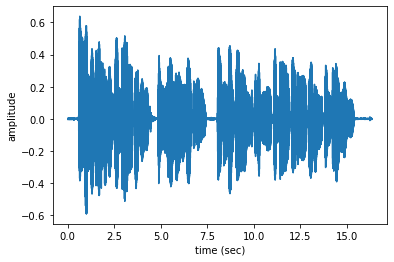

In [25]:
n=7
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(pfile[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

- We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [26]:
MLENDHW_table = [] 

for file in pfile:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  try:
    song = file.split('/')[-1].split('_')[3].split('.')[0]
  except:
    pass
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table

[['S65_hum_3_StarWars.wav', 'S65', 'hum', '3', 'StarWars'],
 ['S86_hum_2_Potter.wav', 'S86', 'hum', '2', 'Potter'],
 ['S101_hum_2_Potter.wav', 'S101', 'hum', '2', 'Potter'],
 ['S65_hum_4_StarWars.wav', 'S65', 'hum', '4', 'StarWars'],
 ['S64_whistle_2_StarWars.wav', 'S64', 'whistle', '2', 'StarWars'],
 ['S32_whistle_2_Potter.wav', 'S32', 'whistle', '2', 'Potter'],
 ['S80_hum_2_StarWars.wav', 'S80', 'hum', '2', 'StarWars'],
 ['S59_hum_1_Potter.wav', 'S59', 'hum', '1', 'Potter'],
 ['S1_hum_2_Potter.wav', 'S1', 'hum', '2', 'Potter'],
 ['S80_whistle_2_Potter.wav', 'S80', 'whistle', '2', 'Potter'],
 ['S64_hum_2_Potter.wav', 'S64', 'hum', '2', 'Potter'],
 ['S56_whistle_2_StarWars.wav', 'S56', 'whistle', '2', 'StarWars'],
 ['S45_hum_2_StarWars.wav', 'S45', 'hum', '2', 'StarWars'],
 ['S92_Whistle_2_Potter.wav', 'S92', 'Whistle', '2', 'Potter'],
 ['S111_hum_3_StarWars.wav', 'S111', 'hum', '3', 'StarWars'],
 ['S18_Whistle_2_Potter.wav', 'S18', 'Whistle', '2', 'Potter'],
 ['S5_hum_2_Potter.wav', '

- We can load the table into a Pandas DataFrame and use Pandas' extra features to investigate the information extracted from the audio file names.

In [27]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S65_hum_3_StarWars.wav,S65,hum,3,StarWars
S86_hum_2_Potter.wav,S86,hum,2,Potter
S101_hum_2_Potter.wav,S101,hum,2,Potter
S65_hum_4_StarWars.wav,S65,hum,4,StarWars
S64_whistle_2_StarWars.wav,S64,whistle,2,StarWars
...,...,...,...,...
S73_hum_2_Potter.wav,S73,hum,2,Potter
S34_whistle_2_Potter.wav,S34,whistle,2,Potter
S77_hum_2_StarWars.wav,S77,hum,2,StarWars


- Feature extraction
>To deal with this massive complexity, one solution is to extract a few features from our signals and use them as predictors instead. We will use four audio features in this notebook: 
>> 1. Power. 
>> 2. Determine the pitch mean. 
>> 3. The standard deviation of the pitch. 
>> 4. The vocal region's fraction.
>> 5. Tempo.
>> 6. spectral centroid.
>> 7. spectral_bandwidth.

In [28]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [29]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #yi = labels_file.loc[fileID]['song']=='Potter'
    if labels_file.loc[fileID]['song']=='Potter' and labels_file.loc[fileID]['tempo'] > 0.5 :
        yi='Harry+Happy'
    if labels_file.loc[fileID]['song']=='Potter' and labels_file.loc[fileID]['tempo'] < 0.5 :
        yi='Harry+Sad'
    if labels_file.loc[fileID]['song']=='StarWars' and labels_file.loc[fileID]['tempo'] > 0.5 :
        yi='StarWars+Happy'
    if labels_file.loc[fileID]['song']=='StarWars' and labels_file.loc[fileID]['tempo'] < 0.5 :
        yi='StarWars+Sad'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    onset_env = librosa.onset.onset_strength(x, sr=fs)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=fs)
    cent = librosa.feature.spectral_centroid(x, sr=fs)
    cent=np.mean(cent)
    spec_bw = librosa.feature.spectral_bandwidth(x, sr=fs)
    spec_bw= np.mean(spec_bw)
    
    xi = [power,pitch_mean,pitch_std,voiced_fr,tempo,spec_bw,cent]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

- For advance solution, since the output of librosa.beat.tempo is 2D list convert it to 1D array and scale to 0 to 1 in order to have flexibility to set threshold for our application. 

In [30]:
from sklearn.preprocessing import MinMaxScaler
tempo=[]
for file in pfile:
    fs = None # Sampling frequency. If None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    onset_env = librosa.onset.onset_strength(x, sr=fs)
    temp =librosa.beat.tempo(onset_envelope=onset_env, sr=fs)
    #temp=temp[0]
    tempo.append(temp)

In [31]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(tempo)
scaled_tempo=[]
for x in scaled:
    m=x[0]
    scaled_tempo.append(m)
print(scaled_tempo[0])

0.13657770800627955


In [32]:
MLENDHW_df['tempo'] = scaled_tempo
MLENDHW_df

,participant,interpretation,number,song,tempo
file_id,,,,,
S65_hum_3_StarWars.wav,S65,hum,3,StarWars,0.136578
S86_hum_2_Potter.wav,S86,hum,2,Potter,0.380863
S101_hum_2_Potter.wav,S101,hum,2,Potter,0.278846
S65_hum_4_StarWars.wav,S65,hum,4,StarWars,0.218227
S64_whistle_2_StarWars.wav,S64,whistle,2,StarWars,0.136578
...,...,...,...,...,...
S73_hum_2_Potter.wav,S73,hum,2,Potter,0.311270
S34_whistle_2_Potter.wav,S34,whistle,2,Potter,0.345238
S77_hum_2_StarWars.wav,S77,hum,2,StarWars,0.162660


- The getXy function will provide NumPy predictor array (`X`) and a binary label (`y`)

In [33]:
X,y = getXy(pfile, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


- visualisations of extracted features by PCA upto 2 components.

Total explained variance =  99.67


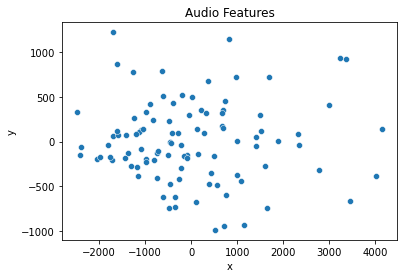

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xp=pca.fit_transform(X)
print("Total explained variance = ",round(pca.explained_variance_ratio_.sum()*100,2))
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1]})

sns.scatterplot(x='x', y='y', data=df_projection)

plt.title("Audio Features")

plt.show()

-Total explained variance tells us that 0.33 of original data might be lost during scaling.

- Splitting the data for traning and validation
> - X_train and X_val will be the inputs
>- y_train and y_val will be the outputs that we use for module evaluation.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, shuffle=False)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((70, 7), (30, 7), (70,), (30,))

# 8 Results



Let's build a Gaussian Naive Bayes model for the predictive task of identifying the type of interpretation (hum/whistle) of an audio signal, using the dataset that we have just created.
We will use the GaussianNB method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set.<br>
- A supervised learning techniques known as Naive Bayes methods. In these methods, Bayes' theorem is applied with the naive assumption that each feature is independent of all others.
- The Naive Bayes methods must be applied to discrete variables, but they can be extended to continuous variables by assuming a Gaussian distribution.

In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

predt=clf.predict(X_train)

from sklearn.metrics import classification_report
print(classification_report(y_train, predt))

                precision    recall  f1-score   support

   Harry+Happy       1.00      1.00      1.00         7
     Harry+Sad       0.68      0.52      0.59        25
StarWars+Happy       1.00      1.00      1.00         1
  StarWars+Sad       0.72      0.84      0.77        37

      accuracy                           0.74        70
     macro avg       0.85      0.84      0.84        70
  weighted avg       0.74      0.74      0.73        70



- model Validation

In [37]:
predv=clf.predict(X_val)
print(classification_report(y_val, predv))

              precision    recall  f1-score   support

 Harry+Happy       1.00      0.60      0.75         5
   Harry+Sad       0.73      0.57      0.64        14
StarWars+Sad       0.50      0.73      0.59        11

    accuracy                           0.63        30
   macro avg       0.74      0.63      0.66        30
weighted avg       0.69      0.63      0.64        30



- Model Testing 
>- Passing a file that was not use for traning or validation.

In [82]:
test_sample = files[222]
test = [test_sample]
test_song = test_sample.split('/')[-1].split('_')[3].split('.')[0]
X1,y1 = getXy(test, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)
p=clf.predict(X1)
Song=p[0].split('+')
print("The actual file passed was of song : ", test_song,"\n The predicted Mood : ",Song[1],"\n The predicted Song : ",Song[0] )

100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

The actual file passed was of song :  StarWars 
 The predicted Mood :  Sad 
 The predicted Song :  StarWars


# 9 Conclusions

- Accuracy:
>- Training accuracy is 74% where as validation accuracy is 63% which suggest that the model is over fitting.
>- The difference between traning and validation and Macro avg F1-score is 18%, which suggest the model performace may not be consistant and the model may not perform well on large data.
- Improvements:
>- There is room for improvement on feature and feature selection.
>- The Threshold used for Emotion/mood predictation can be further exploited to introduce range of Emotions (say:Happy, Sad, Angry, Joyfull, etc) based on the application.
>- Moreover, Passing Song label and mood label  as multidimensional array or dictionary will allow to increase the scope of application and its flexiability.
>- The Problem Statement can futher be adaped to include  More Prediction label based on 'Song+mood' label. Example: Using robert plutchik's wheel of emotions in addition for theme suggestion for music player application, etc. 